# some more models to evaluate, including one that is nan (with phylop and phastcons scores)

In [1]:
#potentially th estrange scale of phylop is the issue? Let's check
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import evals.evals_utils_enformer as e
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-02-20/16-22-00-985351/checkpoints/last.ckpt'
evals = e.Evals(ckpt_path, dataset_class='GPNMSA')

out = evals.dataset[0]
out[0].shape, out[1].shape

(torch.Size([7, 196608]), torch.Size([896, 674]))

In [2]:
out[0][:,:10]

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 1.0000,  1.0000,  0.0000,  1.0000,  1.0000,  0.0000,  1.0000,  1.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [-0.3200, -0.3700, -1.8830, -1.7620,  0.2030, -0.2310, -0.3520, -0.0610,
         -0.0620, -1.8660]])

In [3]:
out[0].max(1)

torch.return_types.max(
values=tensor([1., 1., 1., 1., 0., nan, nan]),
indices=tensor([    5,     8,     2,     0,     0, 20415, 20415]))

In [4]:
#brother we have nans in here!!
#gotta replace the nans
phylop = out[0][-1,:]
phylop

tensor([-0.3200, -0.3700, -1.8830,  ..., -0.2570,  0.1730,  1.2560])

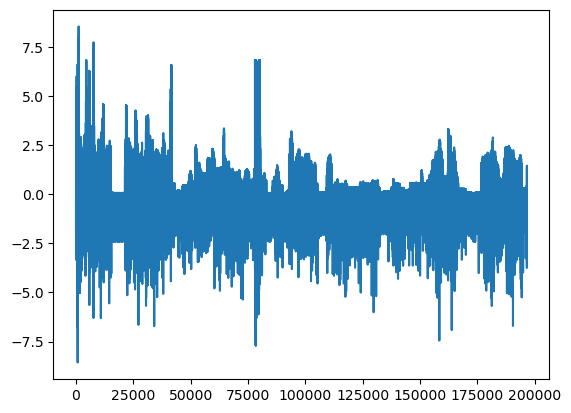

In [8]:
import matplotlib.pyplot as plt
plt.plot(phylop)

In [11]:
#see if any nan are in phylop
import torch
torch.isnan(phylop)

tensor([False, False, False,  ..., False, False, False])

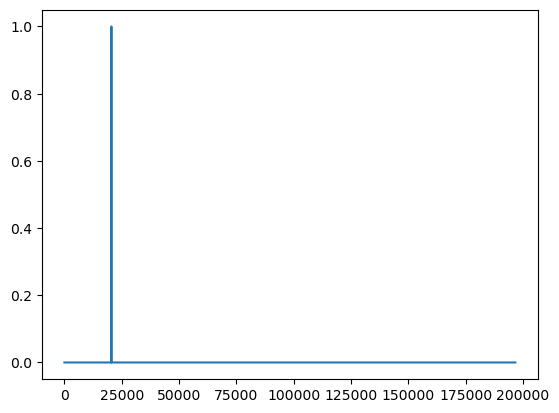

In [12]:
plt.plot(torch.isnan(phylop))

In [13]:
#see those values
phylop[torch.isnan(phylop)] #a whole chunk of them!!

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [14]:
#so just setting both to 0, hopefully that works!!

# retrained now evaluate

In [ ]:
# we can simply use our utils method to get the results, no need for different sizes, just the main correlations is fine?

# we have the nice functions we can call, let's just make sure the sizes and stuff match up

import zarr
zarr_path = '/data1/lesliec/sarthak/data/borzoi/model_outputs/gpnmsa_basic_ohe_2.zarr'

import evals.evals_utils_enformer as e
ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-02-20/16-22-00-985351/checkpoints/last.ckpt'
evals = e.Evals(ckpt_path, dataset_class='GPNMSA')

zarr_open = zarr.open(zarr_path, mode='r')
zarr_open.tree()

/
├── corrs (1937, 674) float32
└── evals (1937, 896, 674) float16

In [2]:
#the shape of data, let's just see
a,b = evals.dataset[0]
a.shape, b.shape

(torch.Size([7, 196608]), torch.Size([896, 674]))

In [3]:
#let's first see the different shapes that the model takes in
#so the input to the backbone is N x length

evals.encoder

IdentityNet()

In [4]:
a,b = evals.dataset[0]
a = a.unsqueeze(0).to(evals.device)

In [6]:
import torch
with torch.no_grad():
    out,_ = evals.backbone(a)
out.shape

torch.Size([1, 196608, 512])

In [ ]:
#so output of the model is batch x length x model_dim